# Decision Tree & Random Forest 

We are going to predict once again if a passenger on the Titanic is going to survive or not using Decision trees and Random forests this time

In [21]:
# survival:    Survival 
# PassengerId: Unique Id of a passenger. 
# pclass:    Ticket class     
# sex:    Sex     
# Age:    Age in years     
# sibsp:    # of siblings / spouses aboard the Titanic     
# parch:    # of parents / children aboard the Titanic     
# ticket:    Ticket number     
# fare:    Passenger fare     
# cabin:    Cabin number     
# embarked:    Port of Embarkation

# importing  packages
import pandas as pd
import seaborn as sns;
from sklearn.preprocessing import LabelEncoder
# making data frame from csv file 
df=pd.read_csv('titanic-passengers.csv', sep=';')


# Data processing

In [22]:
df['Age'] = df['Age'].fillna((df['Age'].median()))
df["Embarked"].fillna("S", inplace=True)
# We remove some columns that we are not going to use for our model.
df.drop(['PassengerId', 'Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)
encoder = LabelEncoder()
df['Survived'] = encoder.fit_transform(df['Survived'])
df['Sex'] = encoder.fit_transform(df['Sex'])
df.head(8)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,2,1,28.0,0,0,13.0000
1,0,3,1,25.0,0,0,7.6500
2,0,3,1,20.0,0,0,7.8542
3,0,3,0,29.0,0,4,21.0750
4,0,1,1,31.0,1,0,52.0000
5,0,3,1,37.0,2,0,7.9250
6,0,3,1,19.0,0,0,14.5000
7,1,3,0,1.0,0,2,15.7417


In [23]:
df.shape

(891, 7)

# Train and build Classifier

In [24]:
# We will use train_test_split from cross_validation module to split our data. 
# 70% of the data will be training data and %30 will be testing data.
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
# X will contain all the features and y will contain the target variable
# # create X (features) and y (response)
train=df
X = train.drop("Survived",axis=1)
y = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20) 

In [8]:
X_train.shape

(623, 6)

In [ ]:
#import matplotlib.pyplot as plt
#from sklearn.datasets import make_blobs
#X, y = make_blobs(n_samples=300, centers=4,
#                  random_state=20, cluster_std=1.0)
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

# Build Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree

# Creating a DecisionTreeClassifier.
# The criterion parameter indicates the measure used (possible values: 'gini' for the Gini index and
# 'entropy' for the information gain).
# The min_samples_leaf parameter indicates the minimum of objects required at a leaf node.
# The min_samples_split parameter indicates the minimum number of objects required to split an internal node.
# The max_depth parameter controls the maximum tree depth. Setting this parameter to None will grow the
# tree until all leaves are pure or until all leaves contain less than min_samples_split samples.

# Create Decision Tree classifer object
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=20)
# Train Decision Tree Classifer
clf_tree.fit(X_train, y_train)  
#Predict the response for test dataset
y_pred = clf_tree.predict(X_test)

# Accuracy can be computed by comparing actual test set values and predicted values.
accuracy = accuracy_score(y_test, y_pred)

print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))



# Setting random seed.
#seed = 10
#tree = DecisionTreeClassifier(criterion='gini',
#min_samples_leaf=3,
#min_samples_split=3,
#max_depth=4,
#random_state=seed) 


DecisionTreeClassifier accuracy score: 0.7947761194029851


In [39]:
len(X_train)
# y_pred

623

In this work, we learned about how to create a visualization diagram of decision tree using two different techniques (Sklearn.tree plot_tree method) and GraphViz method.

# Method1: Plot your decision tree and try to read the tree branches 

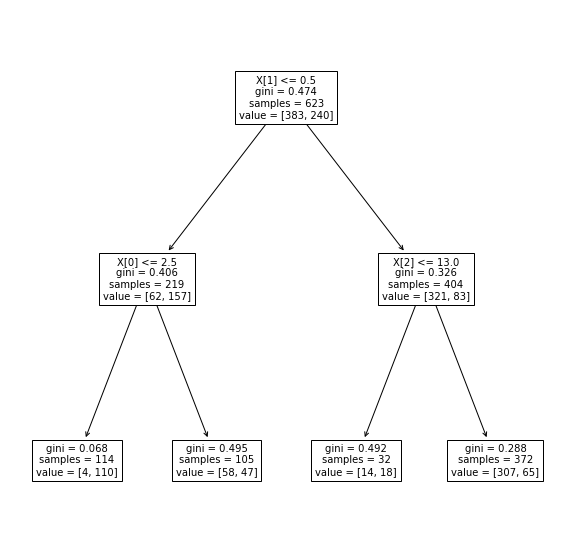

In [27]:
# Plot the decision tree
#
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf_tree, fontsize=10)
plt.show()

Return the depth of the decision tree.

In [33]:
clf_tree.get_depth()

2

Return the number of leaves of the decision tree.

In [34]:
clf_tree.get_n_leaves()

4

# Conclude a prediction manually

Now, based on this data set, Python can create a decision tree that can be used to decide if any new shows are worth attending to. The decision tree uses your earlier decisions to calculate the odds to survive or not.

Rank
Rank <= 0.5 means that every passenger with a rank of 0.5 or lower will follow the True arrow (to the left), and the rest will follow the False arrow (to the right).

gini = 0.494 refers to the quality of the split, and is always a number between 0.0 and 0.5, where 0.0 would mean all of the samples got the same result, and 0.5 would mean that the split is done exactly in the middle.

samples = 623 means that there are 623 passengers left at this point in the decision, which is all of them since this is the first step.

value =[383,240] means that of these 623 passengers, 383 will survive "True", and 240 will not survive "False".

Gini = 1 - (x/n)2 - (y/n)2

1 - (240/623)2 - (383/623)2 = 0.474

True :
Rank <= 2.5 
gini = 0.406 
samples = 219 
value =[62,157] 

1 - (157/219)2 - (62/219)2 = 0.406

False :
Rank <= 13 
gini = 0.326 
samples = 404 
value =[321,83] 

1 - (83/404)2 - (321/404)2 = 0.326


# Method2: Plot your decision tree and try to read the tree branches 

In [ ]:
# Installation of graphviz
import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
os.environ["PATH"] += os.pathsep + 'D:/Graphviz/bin'
pip install graphviz

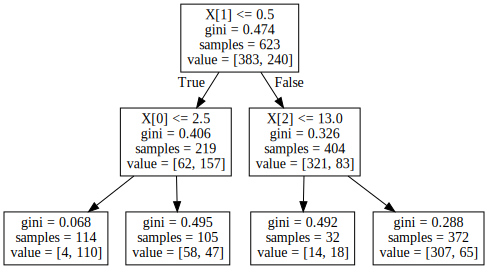

In [19]:
# Decision tree visualization using Graphviz (Max depth = 2)

import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# graph_data = export_graphviz(tree, out_file=None)
graph_data = export_graphviz(clf_tree, out_file=None)
# Generating plot.
graph = graphviz.Source(graph_data)
# graph.render(plot_title)
graph

#feature_names=dataframe.drop(label_col, axis=1).columns,
#class_names=label_names,
#filled=True,
#rounded=True,
#out_file=None)


In [40]:
# Build a text report showing the rules of a decision tree.
# Note that backwards compatibility may not be supported.

text_representation = tree.export_text(clf_tree, max_depth=3)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- class: 1
|   |--- feature_0 >  2.50
|   |   |--- class: 0
|--- feature_1 >  0.50
|   |--- feature_2 <= 13.00
|   |   |--- class: 1
|   |--- feature_2 >  13.00
|   |   |--- class: 0



# Change the decision tree parameters(change at least two parameters:criterion and max_depth)

- Criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
- Max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting

In [40]:
# criterion='entropy', max_depth=2
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20)
clf_tree.fit(X_train, y_train)  # Train
y_pred = clf_tree.predict(X_test)

# Accuracy can be computed by comparing actual test set values and predicted values.
accuracy = accuracy_score(y_test, y_pred)

print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.7910447761194029


In [41]:
# criterion='gini', max_depth=5
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=20)
clf_tree.fit(X_train, y_train)  # Train
y_pred = clf_tree.predict(X_test)

# Accuracy can be computed by comparing actual test set values and predicted values.
accuracy = accuracy_score(y_test, y_pred)

print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.8208955223880597


In [42]:
# criterion='entropy', max_depth=5
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=20)
clf_tree.fit(X_train, y_train)  # Train
y_pred = clf_tree.predict(X_test)

# Accuracy can be computed by comparing actual test set values and predicted values.
accuracy = accuracy_score(y_test, y_pred)

print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.8395522388059702


- Comparison between the different combinaisons demonstrates that criterion='entropy', max_depth=5 gives the best results
- The obtained results using the 'entropy' criterion are slightly better than 'gini' criterion.

# Build Decision Tree Classifier Random forest 

# then change the number of estimators

In [64]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Random Forest Classifier
n_estimators=[50, 100, 150, 200, 250, 300]

Acc=[]
for i in range(len(n_estimators)):
    clf=RandomForestClassifier(n_estimators[i], random_state=20)
    # clf=RandomForestClassifier(n_estimators=150, random_state=20)
    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy=",metrics.accuracy_score(y_test, y_pred))
    Acc.append(metrics.accuracy_score(y_test, y_pred))


Accuracy= 0.8097014925373134
Accuracy= 0.8171641791044776
Accuracy= 0.8208955223880597
Accuracy= 0.8134328358208955
Accuracy= 0.8208955223880597
Accuracy= 0.8246268656716418


The best performances is obtained for n_estimators=300 with Accuracy= 82.46%

# Conclusion:
Random Forest is suitable for situations when we have a large dataset, and interpretability is not a major concern. Decision trees are much easier to interpret and understand. Since a random forest combines multiple decision trees, it becomes more difficult to interpret. In our dataset (Titanic) the dataset is small, so decision tree is better than Random Forest.